In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
# Loading the dataset file
train_features = pd.read_csv('data/Conser-vision_Practice_Area_Image_Classification_-_train_features.csv.csv', index_col='id')
train_labels = pd.read_csv('data/Conser-vision_Practice_Area_Image_Classification_-_train_labels.csv.csv', index_col='id')
test_features = pd.read_csv('data/Conser-vision_Practice_Area_Image_Classification_-_test_features.csv.csv', index_col='id')

In [13]:
train_features.head(), len(train_features)

(                             filepath   site
 id                                          
 ZJ000000  train_features/ZJ000000.jpg  S0120
 ZJ000001  train_features/ZJ000001.jpg  S0069
 ZJ000002  train_features/ZJ000002.jpg  S0009
 ZJ000003  train_features/ZJ000003.jpg  S0008
 ZJ000004  train_features/ZJ000004.jpg  S0036,
 16488)

In [14]:
train_labels.head()

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
id,,,,,,,,
ZJ000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000001,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ000002,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000003,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ000004,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
species = sorted(train_labels.columns.unique())
species, len(species)

(['antelope_duiker',
  'bird',
  'blank',
  'civet_genet',
  'hog',
  'leopard',
  'monkey_prosimian',
  'rodent'],
 8)

> There are *8* different species

## Displaying Images
Now the task is to load and display few images and explore them, we will use random_state=42 for consistency

FileNotFoundError: [Errno 2] No such file or directory: 'data/train_features/ZJ003648.jpg'

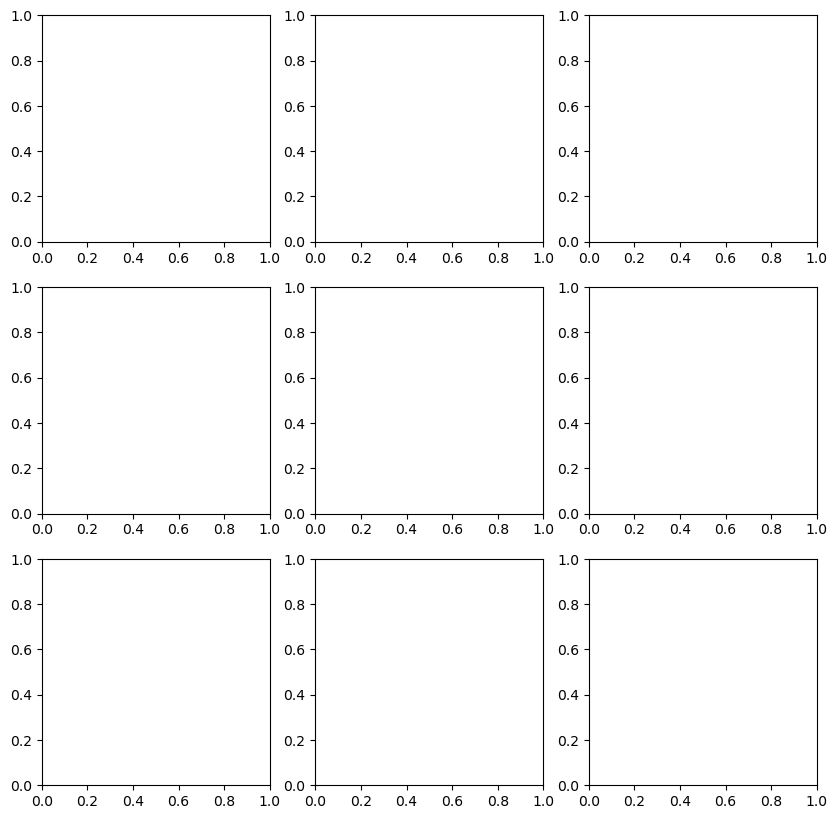

In [16]:
import random
import pathlib

random.seed(42)

# Root image dir
img_dir = 'data'

# Load 9 random images within the range of the train_features
img_index = [random.randint(0, len(train_features) - 1) for _ in range(9)]

fig, axs = plt.subplots(nrows=3,ncols=3,figsize=(10,10))
axs = axs.flatten()
for i, j in enumerate(img_index):
    image_path = pathlib.PurePath(img_dir, train_features.iloc[j]['filepath'])
    image_label = train_labels.columns[np.where(train_labels.iloc[j] == 1)][0]
    image = plt.imread(image_path)
    axs[i].imshow(image)
    axs[i].set_title(image_label)
    axs[i].axis('off')

Can you notice any animal from the picture let's say a bird

In [17]:
# distribution of species across the dataset
train_labels.sum().sort_values(ascending=False)

monkey_prosimian    2492.0
antelope_duiker     2474.0
civet_genet         2423.0
leopard             2254.0
blank               2213.0
rodent              2013.0
bird                1641.0
hog                  978.0
dtype: float64

In [18]:
labels_distribution = train_labels.sum().divide(train_labels.shape[0]).sort_values(ascending=False) # Looking the percentage distribution
labels_distribution

monkey_prosimian    0.151140
antelope_duiker     0.150049
civet_genet         0.146955
leopard             0.136705
blank               0.134219
rodent              0.122089
bird                0.099527
hog                 0.059316
dtype: float64

In [19]:
train_labels.sample(frac=1)

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
id,,,,,,,,
ZJ014647,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ000374,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ZJ013113,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ZJ013688,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ZJ013195,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
ZJ005790,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ012272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ZJ010329,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.model_selection import train_test_split

frac = 0.5
y = train_labels.sample(frac=frac, random_state=42)
x = train_features.loc[y.index]['filepath'].to_frame()

X_train, X_eval, y_train, y_eval = train_test_split(
    x, y, stratify=y, test_size=0.25
)

In [21]:
X_train.head()

,filepath
id,
ZJ002579,train_features/ZJ002579.jpg
ZJ007981,train_features/ZJ007981.jpg
ZJ009552,train_features/ZJ009552.jpg
ZJ006323,train_features/ZJ006323.jpg
ZJ000937,train_features/ZJ000937.jpg


In [22]:
y_train.head()

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
id,,,,,,,,
ZJ002579,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ007981,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZJ009552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
ZJ006323,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
ZJ000937,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [23]:
X_train.shape, y_train.shape, X_eval.shape, y_eval.shape

((6183, 1), (6183, 8), (2061, 1), (2061, 8))

Now since we used stratify=y we can see the distribution of species across train and eval sets

In [24]:
split_pcts = pd.DataFrame(
    {
        'train': y_train.idxmax(axis=1).value_counts(normalize=True),
        'eval': y_eval.idxmax(axis=1).value_counts(normalize=True)
    }
)
print(f'Percentage Split')
(split_pcts.fillna(0) * 100).astype(int)

Percentage Split


,train,eval
antelope_duiker,15,15
monkey_prosimian,15,15
civet_genet,14,14
blank,13,13
leopard,12,13
rodent,12,12
bird,9,9
hog,5,5


In [26]:
import torch
from torch.utils.data import Dataset
from PIL import Image
from torchvision import transforms


class ImageDataset(Dataset):
    def __init__(self, x_df, y_df=None):
        super().__init__()
        self.data = x_df
        self.label = y_df
        self.transform = transforms.Compose(
            [
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize(
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
                )
            ]
        )

    def __getitem__(self, index):
        image = Image.open(self.data.iloc[index]['filepath']).convert('RGB')
        image = self.transform(image)
        image_id = self.data.iloc[index]

        if self.label is None:
            sample = {'image_id':image_id, 'image':image}
        else:
            label = torch.tensor(self.label.iloc[index].values, dtype=torch.float32)
            sample = {'image_id':image_id, 'image':image ,'label':label}

        return sample

    def __len__(self):
        return len(self.data)